In [87]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay

In [88]:
# dataset = pd.read_csv('data/data-tc.csv')
# X = pd.read_csv('data/data-tc.csv', usecols=['Complexity', 'Time', 'Cost'])
dataset = pd.read_csv('data/kmeans/data-preprocess.csv').drop(['B_Req'], axis=1)
X = pd.read_csv('data/kmeans/data-preprocess.csv', usecols=['Complexity', 'Time', 'Cost'])

In [89]:
dataset['Class'].unique()

array([1, 2, 0], dtype=int64)

<AxesSubplot:xlabel='Class', ylabel='Count'>

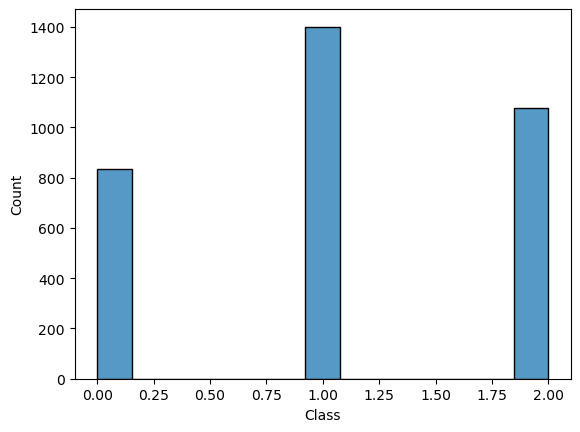

In [90]:
sns.histplot(dataset['Class'])

In [91]:
X_train = pd.read_csv('data/kmeans/data-train.csv').drop(['B_Req'], axis=1)
X_test = pd.read_csv('data/kmeans/data-test.csv').drop(['B_Req'], axis=1)
y_train = X_train['Class']
y_test = X_test['Class']

In [92]:
X_train.drop(['Class'], axis=1, inplace=True)
X_test.drop(['Class'], axis=1, inplace=True)

<AxesSubplot:>

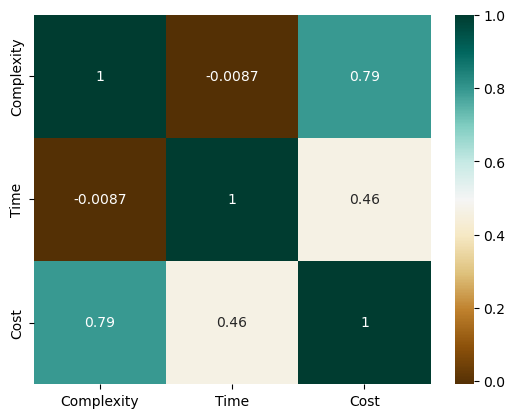

In [93]:
heatcol = X.corr()
sns.heatmap(heatcol,cmap="BrBG",annot=True)

In [94]:
svm_model = SVC(kernel='linear', gamma=0.001, C=70)
svm_model.fit(X_train, y_train)

SVC(C=70, gamma=0.001, kernel='linear')

In [95]:
y_pred = svm_model.predict(X_test)
y_pred = list(y_pred)

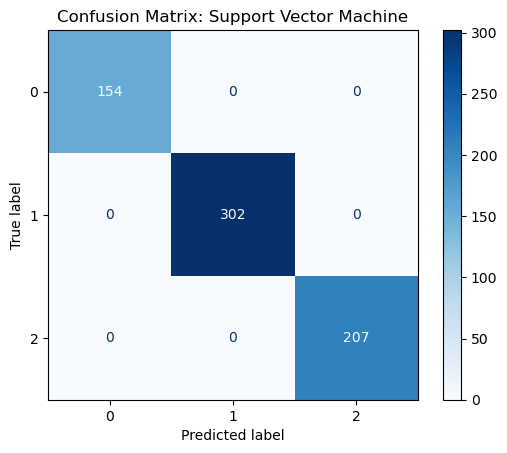

In [96]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: Support Vector Machine")
plt.show()

In [97]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[154   0   0]
 [  0 302   0]
 [  0   0 207]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       302
           2       1.00      1.00      1.00       207

    accuracy                           1.00       663
   macro avg       1.00      1.00      1.00       663
weighted avg       1.00      1.00      1.00       663

